# Ejercicio 1: Implementación del Modelo de Coevolución

En este ejercicio, implementarás las funciones esenciales para simular un modelo de coevolución. En estos modelos, no solo cambian las opiniones de los nodos, ¡sino que la estructura de la red también puede cambiar!

Deberás definir dos funciones en Python:

1.  **`estado_inicial_coevolucion(G: nx.Graph) -> dict`**:
    *   Esta función toma un grafo `G` como entrada.
    *   Debe devolver un diccionario donde las claves son los nodos del grafo y los valores representan la opinión de cada nodo.
    *   Cada nodo debe ser asignado aleatoriamente a una de tres posibles opiniones: `"A"`, `"B"`, o `"C"`.

2.  **`transicion_estado_coevolucion(G: nx.Graph, estado_actual: dict) -> dict`**:
    *   Esta función toma el grafo `G` y el diccionario `estado_actual` de las opiniones de los nodos.
    *   Define cómo cambian los estados y la red en cada paso. La probabilidad de reconexión `p` se fija en `0.9`.
    *   Para cada nodo `v` en el grafo:
        1.  Identifica los vecinos de `v` que tienen una opinión **diferente** a la de `v`.
        2.  Si `v` tiene al menos un vecino con opinión diferente:
            *   Selecciona aleatoriamente uno de estos vecinos con opinión diferente, llámalo `u`.
            *   Con probabilidad `p = 0.9`:
                *   El nodo `v` intenta cambiar su conexión. Primero, elimina la arista entre `v` y `u`.
                *   Luego, `v` busca conectarse con un nodo aleatorio (que no sea ya su vecino y que no sea él mismo) que tenga la **misma** opinión que `v`. Si existe al menos un nodo así, se añade una nueva arista entre `v` y el nodo elegido. Si no existen nodos candidatos para la nueva conexión, `v` simplemente se queda con la arista eliminada y no forma una nueva en este paso.
            *   Con probabilidad `1-p` (es decir, `0.1`):
                *   El nodo `v` cambia su opinión para que sea igual a la opinión del vecino `u`.
    *   La función debe devolver un diccionario que contenga **únicamente** los nodos cuya opinión ha cambiado en este paso y su nueva opinión. Por ejemplo, si el nodo `X` cambió su opinión a `"A"`, el diccionario devuelto sería `{'X': "A"}`. Si ninguna opinión cambia, devuelve un diccionario vacío.
    *   **Importante**: Las modificaciones a la estructura del grafo (eliminar/añadir aristas) se realizan directamente sobre el objeto `G` que se pasa como argumento.

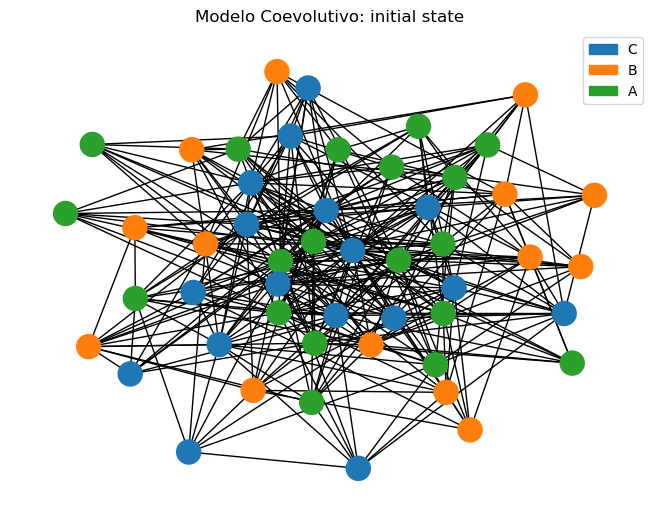

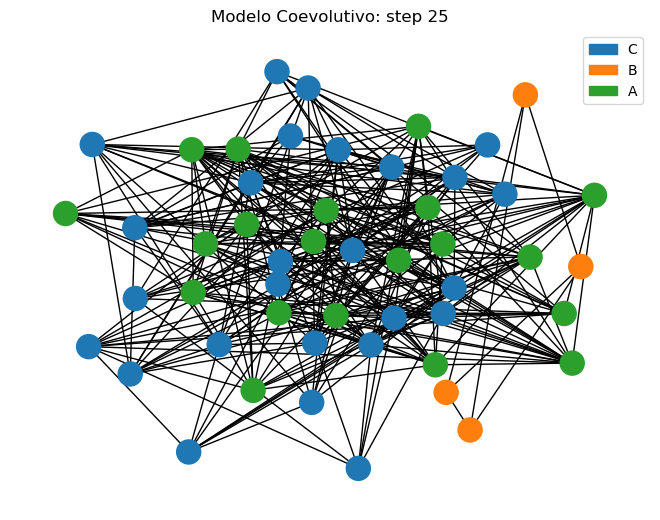

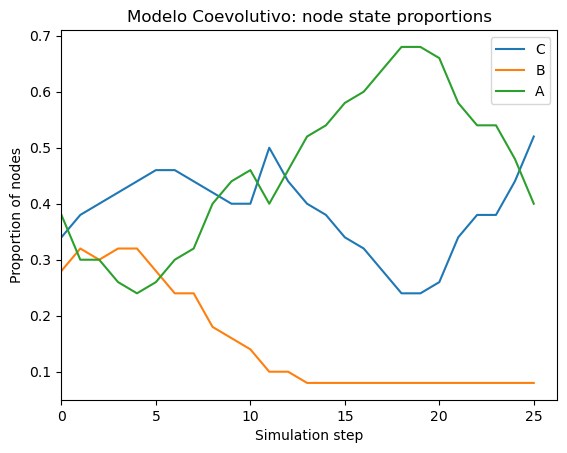

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from simulation import Simulation

def estado_inicial_coevolucion_solucion(G: nx.Graph) -> dict:
    # your code here
    """
    Asigna a cada nodo una opinión inicial aleatoria en {A, B, C}.
    """
    opiniones_posibles = ["A", "B", "C"]
    estado_inicial = {}

    for nodo in G.nodes():
        estado_inicial[nodo] = random.choice(opiniones_posibles)

    return estado_inicial

def transicion_estado_coevolucion_solucion(G: nx.Graph, estado_actual: dict) -> dict:
    # your code here
    """
    Un paso del modelo de coevolución:
    - p = 0.9: se reconfigura una arista hacia un nodo con misma opinión
    - 1 - p = 0.1: el nodo copia la opinión del vecino elegido
    Cambios en la estructura del grafo se aplican directamente sobre G.
    La función devuelve SOLO los nodos cuya opinión cambió.
    """
    p = 0.9
    cambios_opinion = {}

    # Importante: las decisiones se basan en estado_actual (no lo modificamos aquí)
    for v in G.nodes():
        opinion_v = estado_actual[v]

        # Vecinos con opinión distinta a v
        vecinos_diff = [u for u in G.neighbors(v) if estado_actual[u] != opinion_v]

        if not vecinos_diff:
            # No hay conflicto de opiniones, nada que hacer con este nodo
            continue

        # Elegimos un vecino con opinión distinta
        u = random.choice(vecinos_diff)

        # Probamos si reconfiguramos la arista o cambiamos opinión
        if random.random() < p:
            # ---- Caso 1: Reconfiguración de la red (cambia arista, no opinión) ----
            # Eliminamos la arista (v, u)
            if G.has_edge(v, u):
                G.remove_edge(v, u)

            # Buscar candidatos para nueva conexión:
            #   - No ser el propio nodo
            #   - No ser ya vecino de v
            #   - Tener la misma opinión que v (en estado_actual)
            candidatos = [
                w for w in G.nodes()
                if w != v and not G.has_edge(v, w) and estado_actual[w] == opinion_v
            ]

            # Si hay candidatos, conectamos v con uno de ellos
            if candidatos:
                w = random.choice(candidatos)
                G.add_edge(v, w)

            # La opinión de v no cambia en este caso

        else:
            # ---- Caso 2: Cambio de opinión ----
            opinion_u = estado_actual[u]
            if opinion_u != opinion_v:
                cambios_opinion[v] = opinion_u
            # Si fueran iguales (no debería ocurrir dado vecinos_diff), no cambia nada

    return cambios_opinion

g_for_run = nx.path_graph(3) # 0-1-2
initial_s_run = {0:"A", 1:"B", 2:"A"}
g_for_run_copy = g_for_run.copy()
random.seed(42)
changes_run = transicion_estado_coevolucion_solucion(g_for_run_copy, initial_s_run)
assert isinstance(changes_run, dict), "La transición debe devolver un diccionario de cambios."

n = 50
m = 8
G = nx.barabasi_albert_graph(n, m, seed = 123)
sim = Simulation(G, estado_inicial_coevolucion_solucion, transicion_estado_coevolucion_solucion, name='Modelo Coevolutivo')
sim.draw()
plt.show()
sim.run(25)
sim.steps
sim.draw()
plt.show()
sim.plot()
plt.show()